# Ilustration of cell division

This notebook illustrates cell division for the example of a 7-sided cell. It corresponds to Figures 2 (c) and S3 (a-d) in Glassmeier & Feingold (2017).

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import sys, pickle
import random as rand
import pyvoro as pv
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('default')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (4, 4)
if '..' not in sys.path: sys.path.append('..')
import numpy as np
import networkx as nx
import trafo
import scar

def pol2cart(rho, phi, origin):
    x = rho * np.cos(phi) + origin[0]
    y = rho * np.sin(phi) + origin[1]
    return(x, y)

In [2]:
XMAX = YMAX = 1.1
PERIODIC = False

## Prepare an initial network

Create a 7-sided cell in a hexagonal network.

In [3]:
centers = [(0.5,0.5)] # the central cell with 7 sides
angle = 2.*np.pi / 7.

# create neighboring cells
for n in range(7):
    centers += [pol2cart(0.2,n*angle, centers[0])]

# create second shell
for n in range(7):
    centers += [pol2cart(0.4,n*angle, centers[0])]
    centers += [pol2cart(0.4,n*angle+angle/2., centers[0])]
    
# create third shell
for n in range(7):
    centers += [pol2cart(0.45,n*angle, centers[0])]
    centers += [pol2cart(0.45,n*angle+angle/2., centers[0])]
    centers += [pol2cart(0.45,n*angle+angle/4., centers[0])]
    centers += [pol2cart(0.45,n*angle+3.*angle/4., centers[0])]
    
# perform Voronoi tesselation based on cell centers
vor = pv.compute_2d_voronoi(centers, [[0, XMAX], [0, YMAX]], max(XMAX, YMAX), periodic=[PERIODIC, PERIODIC])

# convert Voronoi tesselation into cellular network data structure
G = trafo.create_graph_from_vor(vor, periodic=PERIODIC, xmin=0, xmax=XMAX, ymin=0, ymax=YMAX)
Gini = G.copy()

## Cell division

Divide the central 7-sided cell (cell 0), creating a new cell at its junction with cells 1 and 2. Show intermediate steps by activating the debug option.

celldivision: initial graph


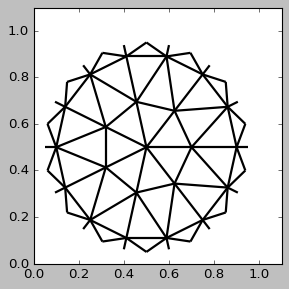

celldivision: inserted new vertex


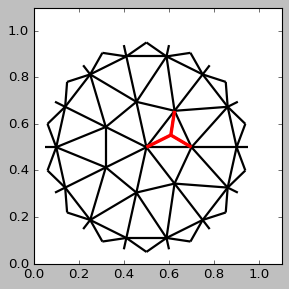

celldivision: edge flipped


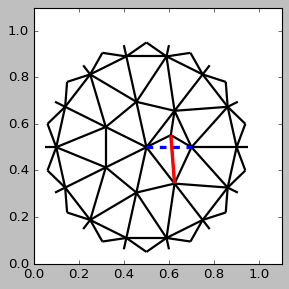

celldivision: edge flipped


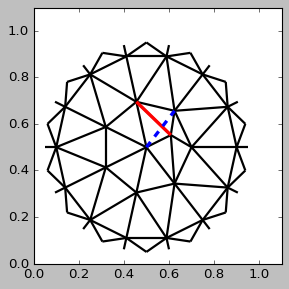

celldivision: done


In [4]:
rand.seed(531)
_, _ = trafo.celldivision(G, [0], [(0,1,2)], periodic=PERIODIC, preferential=True, debug=True)

## Show the triangulation (dual network) before and after cell division

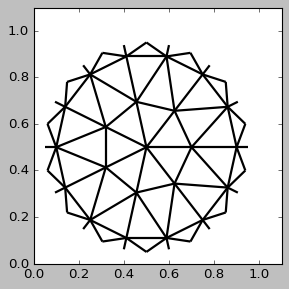

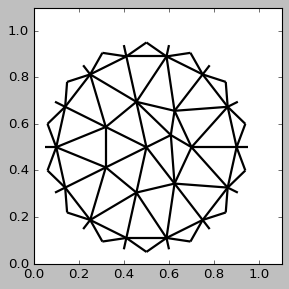

In [5]:
trafo.plot_triangulation(Gini)
trafo.plot_triangulation(G)

## Show the topological scar (sidedness difference) of the cell division

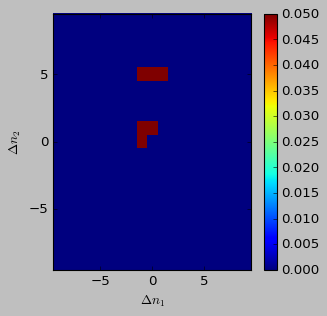

In [6]:
scar.plot_degree_difference_histogram(*scar.degree_difference_stat(scar.degree_difference_graph(G, Gini)))